<a href="https://colab.research.google.com/github/anujapande2001/MLProjects/blob/main/TelecomChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TELECOM CHURN PREDICTION**

# **1. Introduction**


**Your client for this project is a Telecom Service Provider..**


*  The company has started facing high churn rate due to rapid development in technology and the emerging new competitors in the market.
*  The objective is to use the model to take further actions for preventing customers to churn.
*   They will have to offer something to their customers so they stick around, example - a promo, discount, loyalty program etc.

**Current Scenario:**

* Till now they have been using traditional ways which now have become a problem to handle due to human interventions.

*   They have a detailed history of their customers and are looking for an automated solution to identify the likeliness of customer churning from using their services.






# **2. Problem Statement**
**The current process suffers from the following problems:**

*   Due to the boom in the telecom industry with 4G technology, it has become a pain in the neck for the company to retain their customers.
*   They are in the middle of setting up more cell sites on the 4G network to improve their 4G services.
*   It is plausible for customers to choose 4G services over 3G services due to benefits of cost, speed, latency etc.


The company has hired you as data science consultants. They want to automate the process of assigning the drug according to their health report.

**Your Role**
*  You are given datasets of past customers and their status (Churn: Yes or No).
*  Your task is to build a classification model using the dataset.
*  Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.


# **3. Import Libraries**

In [19]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler,RobustScaler
# import sklearn.linear_model.LogisticRegression as LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate,KFold
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve,auc,classification_report
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings


# **4. Data Acquisition & Description**

In [20]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Telecom-Churn/Churn_train.csv")
dataValidation=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Telecom-Churn/Churn_test.csv")
dataValidationId=dataValidation.customerID
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,No


### **4.1 Data Information**

- In this section we will see the **information about the types of the features**.




In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


### **4.2 Data Description**

- In this section we will get **information about the data** and see some observations.

In [22]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5634.000000
mean,0.161874,32.277955,64.779127
std,0.368368,24.555211,30.104993
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.400000
50%,0.000000,29.000000,70.375000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.650000


# **5. Data Pre-Processing**

### **5.1 Data Pre-Profiling**


In [23]:
data.drop("TotalCharges", axis=1, inplace=True)

**Check null value or any other inconsistent value in column**

In [24]:
print((data=="").sum(), "\n")

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64 



In [25]:
print(data.isna().sum(), "\n")


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64 



In [26]:
print((data=="Unknown").sum(), "\n")


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64 



In [27]:
print((data==0).sum(), "\n")

customerID             0
gender                 0
SeniorCitizen       4722
Partner                0
Dependents             0
tenure                 8
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
Churn                  0
dtype: int64 



In [28]:
data.duplicated().any()

False

In [29]:
catCol=["gender","SeniorCitizen","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity",
        "OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling",
        "PaymentMethod","Churn"]
for col in catCol:
  print(data[col].value_counts())



Male      2838
Female    2796
Name: gender, dtype: int64
0    4722
1     912
Name: SeniorCitizen, dtype: int64
No     3968
Yes    1666
Name: Dependents, dtype: int64
Yes    5087
No      547
Name: PhoneService, dtype: int64
No                  2700
Yes                 2387
No phone service     547
Name: MultipleLines, dtype: int64
Fiber optic    2479
DSL            1934
No             1221
Name: InternetService, dtype: int64
No                     2801
Yes                    1612
No internet service    1221
Name: OnlineSecurity, dtype: int64
No                     2498
Yes                    1915
No internet service    1221
Name: OnlineBackup, dtype: int64
No                     2473
Yes                    1940
No internet service    1221
Name: DeviceProtection, dtype: int64
No                     2781
Yes                    1632
No internet service    1221
Name: TechSupport, dtype: int64
No                     2246
Yes                    2167
No internet service    1221
Name: Streaming

### **5.2 Data Cleaning**

- N/A

### **5.3 Data Post-Profiling**

- Next, we will generate and verify the report to identify any new observation that can help us in further analysis.

# **6. Exploratory Data Analysis**

### **Check distribution of numerical features and Outliers**

outliers in feature tenure are
 Series([], Name: tenure, dtype: int64)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

outliers in feature MonthlyCharges are
 Series([], Name: MonthlyCharges, dtype: float64)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


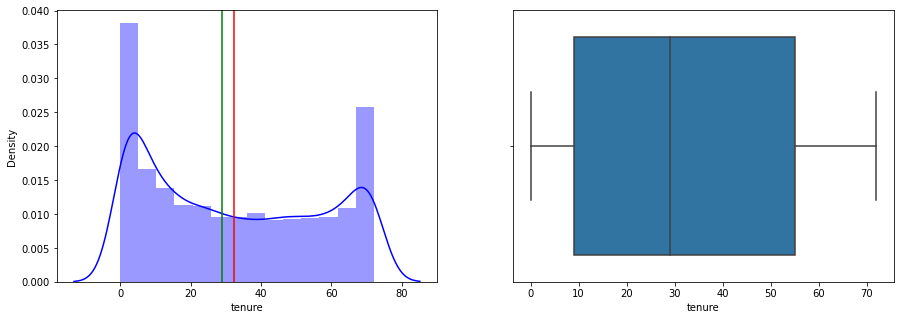

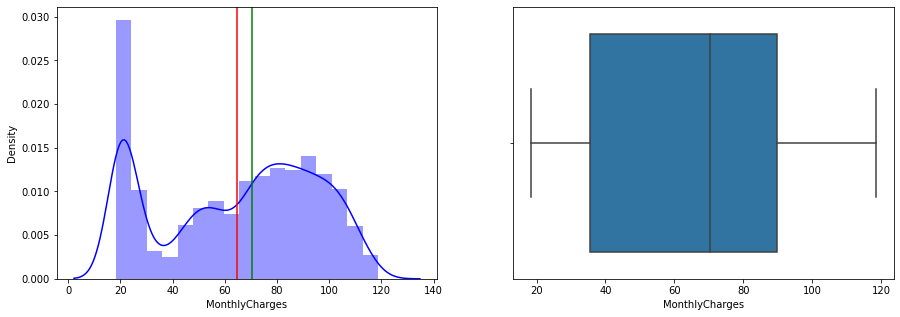

In [30]:
contColumn=["tenure","MonthlyCharges"]

for col in contColumn:  
  fig=plt.figure(figsize=[15,5])
  plt.subplot(1,2,1)
  sns.distplot(data[col], color="b")
  plt.axvline(data[col].mean(), color="r")
  plt.axvline(data[col].median(), color="g")
  plt.subplot(1,2,2)
  sns.boxplot(data[col])
  quamtile_75=data[col].quantile(q=.75)
  quamtile_25=data[col].quantile(q=.25)
  iqr=quamtile_75-quamtile_25
  lower_limit=quamtile_25-1.5*iqr
  upper_limit=quamtile_75+1.5*iqr
  outliers=data[col][(data[col]<lower_limit )|(data[col]>upper_limit)]
  print("outliers in feature", col ,"are\n" ,outliers)
  # data.drop(index=outliers.index, inplace=True)

  

### **Check the frequency of catrgorical features**

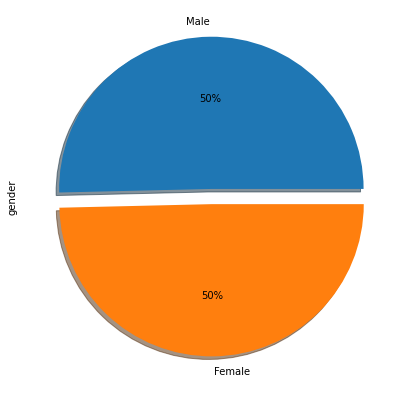

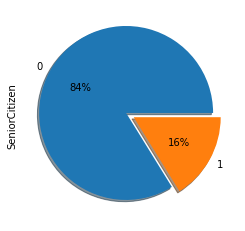

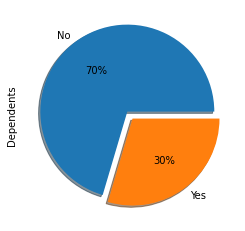

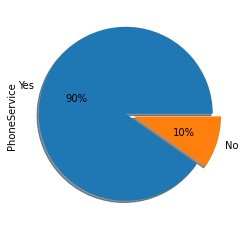

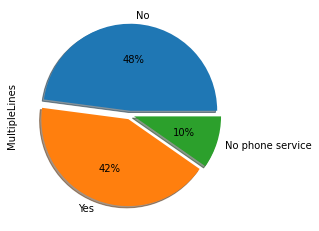

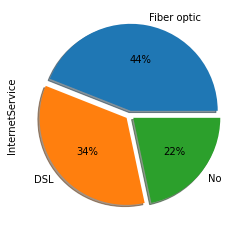

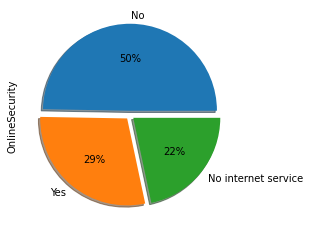

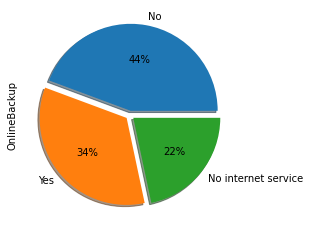

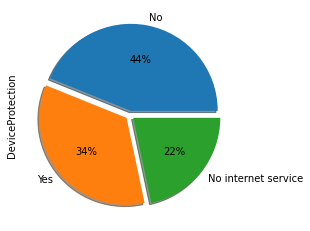

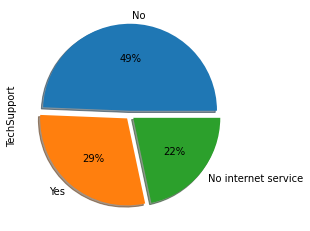

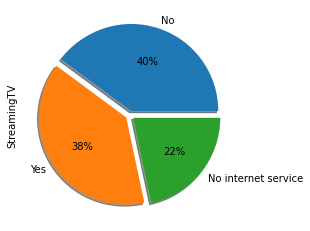

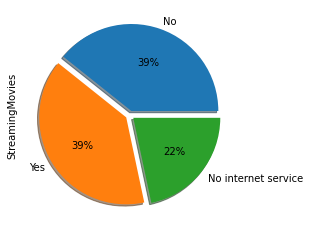

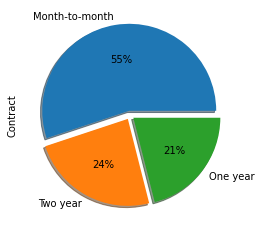

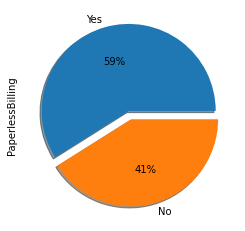

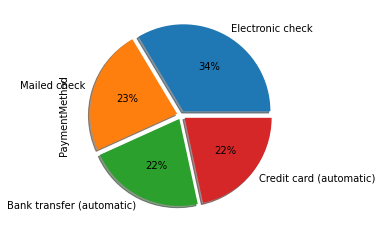

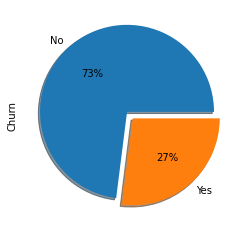

In [31]:
# fig=plt.figure(figsize=[25,10])
fig=plt.figure(figsize=[15,7])
for col in catCol:  
  # plt.subplot(1,len(catCol),(catCol.index(col))+1)
  space = np.ones(data[col].nunique())/20
  data[col].value_counts().plot(kind='pie', explode=space, autopct='%1.0f%%',shadow = True)
  plt.show()


### **Analize Relationship between each Categorical Variable and Target Variable**

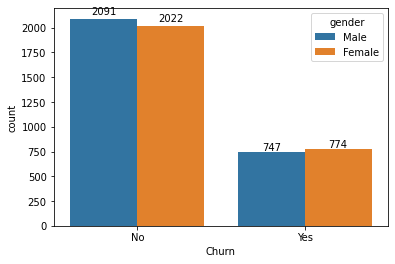

In [32]:
ax=sns.countplot(x="Churn",hue="gender",data=data)
df_percent = df.div(df.sum(axis=1), axis=0).mul(100).round(1)
for p in ax.patches:
  width=p.get_width()
  height=p.get_height()
  x,y=p.get_xy()
  ax.annotate(f"{height}",(x+width/2,y+height*1.02),ha="center")

# df=data.groupby(["Churn","gender"])["gender"].count().unstack()
# df

In [33]:
df_percent = df.div(df.sum(axis=1), axis=0).mul(100).round(1)
df_percent

Churn,No,Yes
Churn,,
No,100.0,NaN
Yes,NaN,100.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<Figure size 1080x360 with 0 Axes>

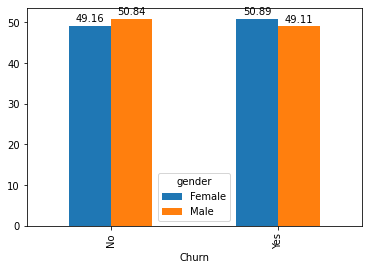

<Figure size 1080x360 with 0 Axes>

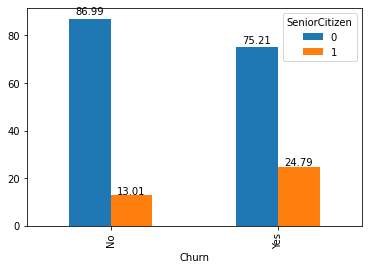

<Figure size 1080x360 with 0 Axes>

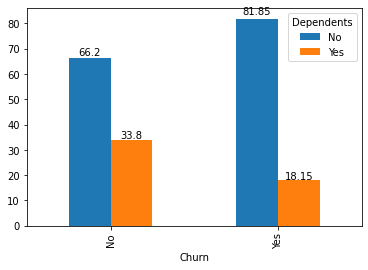

<Figure size 1080x360 with 0 Axes>

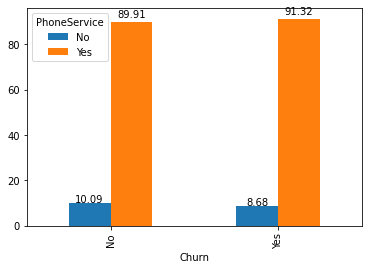

<Figure size 1080x360 with 0 Axes>

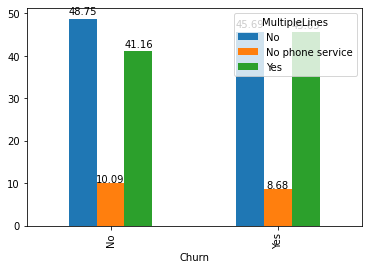

<Figure size 1080x360 with 0 Axes>

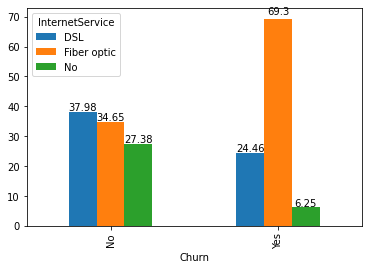

<Figure size 1080x360 with 0 Axes>

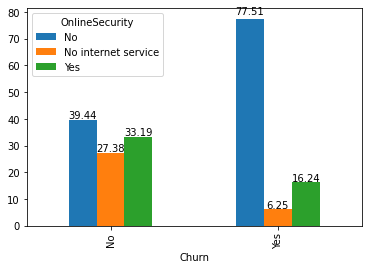

<Figure size 1080x360 with 0 Axes>

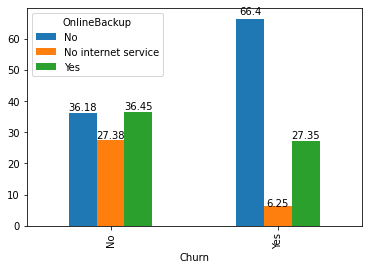

<Figure size 1080x360 with 0 Axes>

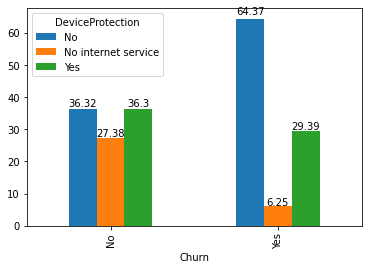

<Figure size 1080x360 with 0 Axes>

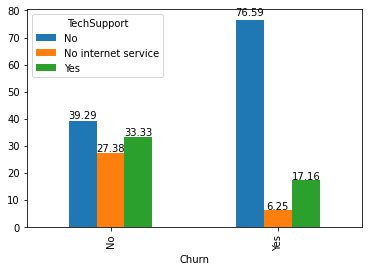

<Figure size 1080x360 with 0 Axes>

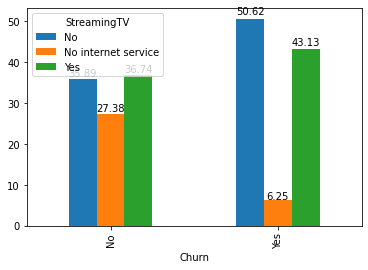

<Figure size 1080x360 with 0 Axes>

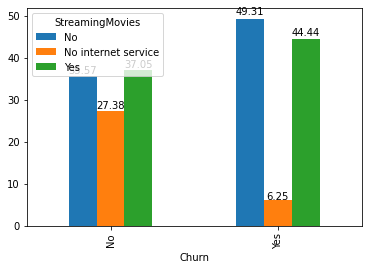

<Figure size 1080x360 with 0 Axes>

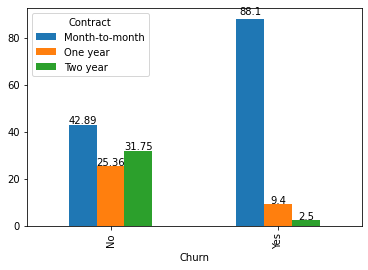

<Figure size 1080x360 with 0 Axes>

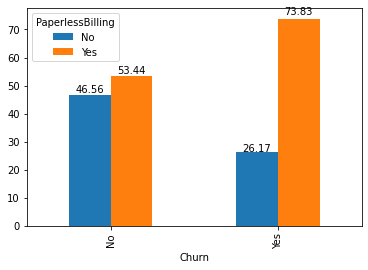

<Figure size 1080x360 with 0 Axes>

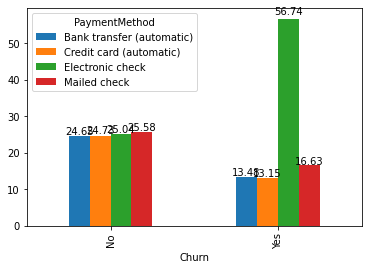

<Figure size 1080x360 with 0 Axes>

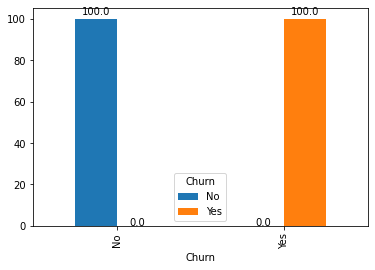

In [34]:
for col in catCol:
  fig=plt.figure(figsize=[15,5])
  df=data.groupby(["Churn",col])[col].count().unstack()
  ax = df.div(df.sum(axis=1), axis=0).mul(100).round(2).plot.bar()
  for p in ax.patches:
    width=p.get_width()
    height=p.get_height()
    x,y=p.get_xy()
    ax.annotate(height,(x+width/2,y+height*1.02),ha="center")
  
  # plt.subplot(1,2,1)
  # data1=data.groupby(["BP","Cholesterol"])["Id"].count().unstack()
  # sns.heatmap(data1,annot=True,cmap="Blues",linecolor='Red',linewidth=1)
  # plt.subplot(1,2,2)
  # data1=data.groupby(["BP","Cholesterol","Drug"])["Drug"].count().unstack()
  # sns.heatmap(data1,annot=True,cmap="Blues",linecolor='Red',linewidth=1)

### **Correlation Matrix**

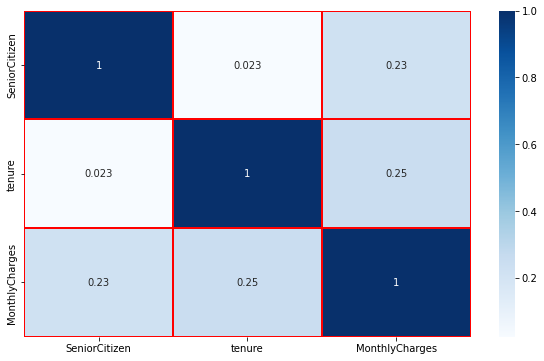

In [35]:
figure=plt.figure(figsize=[10,6])
sns.heatmap(data.corr(), cmap="Blues", annot=True,linecolor='Red',linewidth=1)

# **7. Data Post-Processing**

### **7.1 Data Preparation/Feature Selection**



In [40]:
features=["SeniorCitizen","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity",
        "OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling",
        "PaymentMethod","tenure","MonthlyCharges"]
X=data[features]
y=data.Churn
dataValidation=dataValidation[features]

X


,SeniorCitizen,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges
0,0,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,12,19.70
1,0,No,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic),42,73.90
2,0,No,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic),71,65.15
3,0,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,71,85.45
4,0,No,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Electronic check,30,70.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,1,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,9,100.50
5630,0,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,60,19.95
5631,0,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,28,105.70
5632,0,No,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,2,54.40


# **8. Model Development & Evaluation**

In [51]:
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score,cross_validate,cross_val_predict
from sklearn.pipeline import make_pipeline

# Define which columns should be encoded
columns_to_encode=catCol=["SeniorCitizen","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity",
        "OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling",
        "PaymentMethod"]
columns_to_scale=contColumn
kf=KFold(10,shuffle=True,random_state=50)
# Instantiate column transformer
column_trans=make_column_transformer((OneHotEncoder(drop="first"),columns_to_encode),(RobustScaler(),columns_to_scale),
                                     remainder="passthrough")

# Instantiate Decision Tree Model
# modelDT=RandomForestClassifier(random_state=50)
modelDT=LogisticRegression()
# Make Pipeline
pipe=make_pipeline(column_trans,modelDT)

cv_score=cross_validate(pipe,X,y,cv=kf,n_jobs=-1,scoring="accuracy",return_train_score=True)
cv_score_df=pd.DataFrame(cv_score)
print(cv_score_df)
print(cv_score_df.mean())
print(pipe)
pipe.fit(X,y)
# dataValidation_pred=pipe.predict(dataValidation)

# submission = pd.DataFrame({'Id':dataValidationId,'Drug':dataValidation_pred})
# from google.colab import files
# submission.to_csv('submission.csv', encoding = 'utf-8-sig',index=False,header=False) 
# files.download('submission.csv')





   fit_time  score_time  test_score  train_score
0  0.155631    0.016945    0.806738     0.801183
1  0.164883    0.014650    0.820922     0.800986
2  0.146115    0.017817    0.790780     0.805128
3  0.157701    0.017977    0.794326     0.802170
4  0.147082    0.017171    0.836590     0.799448
5  0.162925    0.023025    0.806394     0.802800
6  0.165770    0.015581    0.770870     0.806153
7  0.148040    0.021337    0.774423     0.803195
8  0.160930    0.016587    0.820604     0.801814
9  0.159518    0.010895    0.783304     0.804772
fit_time       0.156859
score_time     0.017199
test_score     0.800495
train_score    0.802765
dtype: float64
Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['SeniorCitizen',
                                      

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['SeniorCitizen',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                

In [58]:
df_out=pd.DataFrame(column_trans.fit_transform(X),columns=column_trans.get_feature_names_out())
df_out

,onehotencoder__SeniorCitizen_1,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__OnlineSecurity_No internet service,onehotencoder__OnlineSecurity_Yes,onehotencoder__OnlineBackup_No internet service,...,onehotencoder__StreamingMovies_No internet service,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,robustscaler__tenure,robustscaler__MonthlyCharges
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.369565,-0.930670
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.282609,0.064738
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.913043,-0.095960
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.913043,0.276860
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.021739,0.000459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.434783,0.553260
5630,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.673913,-0.926079
5631,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.021739,0.648760
5632,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.586957,-0.293388


In [ ]:

data1=data.copy()
data1=pd.get_dummies(data1,drop_first=True)
sns.heatmap(data1.corr())

# **9. Dump Model using Pickle**

In [52]:
import pickle

##dump the model into a file
with open("/content/drive/MyDrive/Colab Notebooks/ModelBin/TeleChurn_model.pkl", 'wb') as f_out:
    pickle.dump(pipe, f_out) # write final_model in .bin file
    f_out.close()  # close the file 

# **10. Load Model using Pickle and Predict Output**

In [54]:
##loading the model from the saved file
with open('/content/drive/MyDrive/Colab Notebooks/ModelBin/TeleChurn_model.pkl', 'rb') as f_in:
    model = pickle.load(f_in)

##Predict
dataValidation_pred=model.predict(dataValidation)
print(dataValidation_pred)

submission = pd.DataFrame({'Id':dataValidationId,'Drug':dataValidation_pred})
from google.colab import files
submission.to_csv('submission.csv', encoding = 'utf-8-sig',index=False,header=False) 
files.download('submission.csv')

['No' 'No' 'No' ... 'No' 'No' 'Yes']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>